In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [0]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [2]:
data = pd.read_csv('C:\\Ishan\\Greatlearning\\Labs\\4. 5 Oct\\german_credit.csv')
data.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [0]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [4]:
# Print Shape of model data
data.shape

(1000, 21)

In [15]:
data_new=pd.get_dummies(data,drop_first=True)
data_new.head(5)

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
0,0,6,1169,4,4,67,2,1,1,0,...,0,1,0,1,0,1,0,0,1,1
1,1,48,5951,2,2,22,1,1,0,0,...,0,1,0,1,0,1,0,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,0,1,0,1,0,0,0,1,0,1
3,0,42,7882,2,4,45,1,2,1,0,...,0,1,0,0,0,1,0,0,0,1
4,1,24,4870,3,4,53,2,2,1,0,...,1,1,0,0,0,1,0,0,0,1


### Check for highly correlated variables but don't required any treatment for this use case

In [16]:
data_new.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,property_unknown / no property,other_installment_plans_none,other_installment_plans_stores,housing_own,housing_rent,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,"telephone_yes, registered under the customers name",foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.258333,-0.044009,...,0.125750,-0.113285,0.050523,-0.134589,0.092785,-0.013559,0.005951,-0.021822,-0.036466,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.022244,-0.076455,...,0.212838,-0.067602,0.065688,-0.075169,-0.064417,0.055010,-0.044043,-0.181203,0.164718,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,-0.020912,-0.100510,...,0.248922,-0.048292,0.024262,-0.117497,-0.024611,-0.092636,-0.027969,-0.161757,0.276995,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,0.046917,-0.041591,...,0.044990,-0.016139,0.056071,0.049922,-0.091373,0.042623,-0.087834,-0.057237,0.014413,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,0.088350,-0.064303,...,0.188028,0.016704,-0.054460,-0.297547,0.167285,-0.000657,-0.034545,0.009065,0.095359,0.054097
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.011162,0.037504,...,0.206368,-0.035362,-0.011080,0.006553,-0.212620,-0.148283,0.059954,0.043712,0.145259,0.006151
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.029195,-0.040213,...,-0.012850,-0.050290,0.023496,0.041386,-0.058070,-0.001471,0.059582,-0.010392,0.065553,0.009717
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,0.059041,-0.008700,...,0.077548,-0.072220,0.009335,-0.027579,-0.063033,-0.106737,-0.007723,0.145066,-0.014753,-0.077071
account_check_status_< 0 DM,0.258333,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,1.000000,-0.159297,...,0.048476,-0.017494,0.011886,-0.125705,0.093310,-0.002879,-0.000428,0.023542,-0.067149,-0.057751
account_check_status_>= 200 DM / salary assignments for at least 1 year,-0.044009,-0.076455,-0.100510,-0.041591,-0.064303,0.037504,-0.040213,-0.008700,-0.159297,1.000000,...,-0.008005,-0.002983,0.020206,0.018934,-0.035183,-0.022932,0.073347,0.014405,-0.028955,-0.036392


# Highly corelated variables:-
1) Creadit Amount and Duration in Month

### Drop the original variables which are converted to dummy

# It is already done in previous Steps

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [17]:
from sklearn.model_selection import train_test_split
X = data_new.drop(["default"], axis=1)
y = data_new[["default"]]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, random_state = 7)

In [22]:
X_train.shape

(700, 48)

In [23]:
X_test.shape

(300, 48)

In [24]:
y_train.shape

(700, 1)

In [25]:
y_test.shape

(300, 1)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_jobs=2,n_estimators = 500, max_depth=5, criterion="entropy",random_state=9999)

In [27]:
rfcl = rfcl.fit(X_train, y_train)

In [28]:
rfcl.score(X_train, y_train)

0.78

In [29]:
rfcl.score(X_test, y_test)

0.7433333333333333

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [33]:
from sklearn.metrics import recall_score
from sklearn import metrics
y_predict_train = rfcl.predict(X_train)
y_predict = rfcl.predict(X_test)
model_score_train = rfcl.score(X_train, y_train)
model_score = rfcl.score(X_test, y_test)

In [35]:
print("Score of Training",model_score_train)
print("Score of Test",model_score)
print("F1 Score of Training")
print(metrics.classification_report(y_train, y_predict_train))
print("F1 Score of Test")
print(metrics.classification_report(y_test, y_predict))

Score of Training 0.78
Score of Test 0.7433333333333333
F1 Score of Training
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       483
           1       1.00      0.29      0.45       217

   micro avg       0.78      0.78      0.78       700
   macro avg       0.88      0.65      0.66       700
weighted avg       0.83      0.78      0.73       700

F1 Score of Test
              precision    recall  f1-score   support

           0       0.75      0.98      0.85       217
           1       0.69      0.13      0.22        83

   micro avg       0.74      0.74      0.74       300
   macro avg       0.72      0.55      0.53       300
weighted avg       0.73      0.74      0.67       300



In [37]:
from sklearn.metrics import accuracy_score
print("Accuracy Score of Train",accuracy_score(y_train, y_predict_train))

Accuracy Score 0.78


In [38]:
print("Accuracy Score of test",accuracy_score(y_test, y_predict))

Accuracy Score of test 0.7433333333333333


In [39]:
print("Confusion metrix")
print("Confusion metrix of Train data")
print(metrics.confusion_matrix(y_train, y_predict_train))
print("Confusion metrix of Test data")
print(metrics.confusion_matrix(y_test, y_predict))

Confusion metrix
Confusion metrix of Train data
[[483   0]
 [154  63]]
Confusion metrix of Test data
[[212   5]
 [ 72  11]]


### Q6 Show the list of the features importance( 1 Marks)

In [43]:
# Print the name and gini importance of each feature
for feature in zip(data_new,rfcl.feature_importances_):
    print(feature)

('default', 0.0990746767494959)
('duration_in_month', 0.10630055210388271)
('credit_amount', 0.02421015000135833)
('installment_as_income_perc', 0.018099477225011432)
('present_res_since', 0.06902003175946576)
('age', 0.01307831421284445)
('credits_this_bank', 0.008387021828255965)
('people_under_maintenance', 0.07308459729203216)
('account_check_status_< 0 DM', 0.0074992526996588505)
('account_check_status_>= 200 DM / salary assignments for at least 1 year', 0.15507440724557658)
('account_check_status_no checking account', 0.029718051991839304)
('credit_history_critical account/ other credits existing (not at this bank)', 0.009337388739867938)
('credit_history_delay in paying off in the past', 0.008259418483221299)
('credit_history_existing credits paid back duly till now', 0.015180942363801853)
('credit_history_no credits taken/ all credits paid back duly', 0.008413061435761642)
('purpose_business', 0.01567518879517818)
('purpose_car (new)', 0.019390193334079396)
('purpose_car (used)

In [45]:
##Identify And Select Most Important Features
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(rfcl, threshold=0.15)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.15)

In [52]:
for feature_list_index in sfm.get_support(indices=True):
    print(feature_list_index)

9


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [101]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [102]:
# Use below values
num_folds = 10
seed = 77

In [0]:
#Validate the Random Forest model build above using k fold

In [103]:
kf = KFold(n_splits=10)
kf.get_n_splits(X_train)
print(kf)

KFold(n_splits=10, random_state=None, shuffle=False)


In [104]:
for train_index, test_index in kf.split(X_train):
    ##print("TRAIN:", train_index, "TEST:", test_index)
    X_, y_ = (X_train, y_train)
    rfcl.fit(X_, y_)
    y_pred = rfcl.predict(X_train)

In [105]:
T=cross_val_score(rfcl, X,y, cv=10)
print(T)

[0.73 0.72 0.69 0.76 0.76 0.71 0.69 0.74 0.73 0.74]


In [0]:
#Calculate Mean score

In [94]:
T.mean()

0.727

In [0]:
# Calculate score standard deviation using std()

In [95]:
T.std()

0.023685438564654045

# Q8 Print the confusion matrix( 1 Marks)

In [96]:
metrics.confusion_matrix(y_, y_pred)

array([[483,   0],
       [154,  63]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [97]:
print("Score of Test",model_score)
print("F1 Score of Training")
print(metrics.classification_report(y_, y_pred))
print("F1 Score of Test")
print(metrics.classification_report(y_, y_pred))

Score of Test 0.7433333333333333
F1 Score of Training
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       483
           1       1.00      0.29      0.45       217

   micro avg       0.78      0.78      0.78       700
   macro avg       0.88      0.65      0.66       700
weighted avg       0.83      0.78      0.73       700

F1 Score of Test
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       483
           1       1.00      0.29      0.45       217

   micro avg       0.78      0.78      0.78       700
   macro avg       0.88      0.65      0.66       700
weighted avg       0.83      0.78      0.73       700



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [0]:
#Hint: Use roc_curve

In [116]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc
probas1_ = rfcl.fit(X_train, y_train).predict_proba(X_test)

In [122]:
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1_[:, 1])

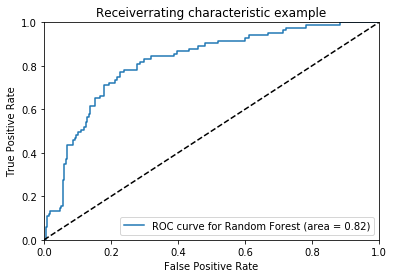

In [123]:
import pylab as pl
pl.clf()
pl.plot(fpr1, tpr1, label='ROC curve for Random Forest (area = %0.2f)' % roc_auc1)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [124]:
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.818056


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [106]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [108]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfcl.fit(X_, y_)
    y_pred = rfcl.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [109]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.7456666666666667
Standard deviation:  0.006333333333333338
